<a href="https://colab.research.google.com/github/zhangxs131/Machine_learning_notebook/blob/main/knn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-近邻 完成手写数字识别

数据集 28*28 图片的10分类任务

使用sklearn中KNeighborsClassifier完成任务

参数有 
*    k   k值
*    weights（uniform,distance） 计算距离权重，均等权重，距离权重
*    algorithm 快速k近邻搜索，auto，ball_tree,kd_tree,brute
*    leaf_size:30 构造kd tree和ball tree的大小
*    metric 度量距离方式，默认minkowski 欧式距离
*    p 1:曼哈顿距离，2：欧式距离


In [ ]:
#使用torchvision加载数据集

from torchvision import datasets, transforms
import torch


train_dataset = datasets.MNIST(root = 'data/', train = True, download = True)
test_dataset = datasets.MNIST(root = 'data/', train = False,  download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
import numpy as np


def get_data(dataset):
  m=len(dataset)
  train_array=np.zeros((m,28,28))
  labels=[]
  for i in range(m):
    train_array[i]=np.array(dataset[i][0])
    labels.append(dataset[i][1])

  train_array=train_array.reshape(m,-1)

  return train_array,labels

train_x,train_y=get_data(train_dataset)
test_x,test_y=get_data(test_dataset)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn=KNN(n_neighbors=4)
knn.fit(train_x,train_y)

result=knn.predict(test_x)

In [ ]:
errorCount=0.0

for i in range(len(result)):
  if result[i]!=test_y[i]:
    errorCount+=1
print('错误率:{}'.format(errorCount/float(len(result))))

错误率:0.0318


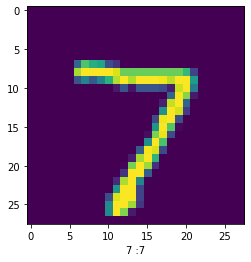

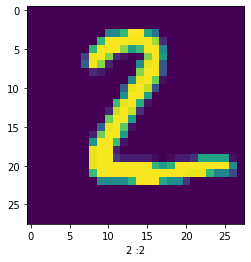

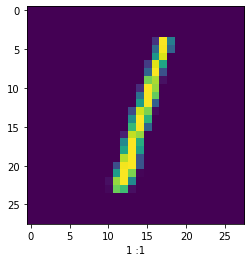

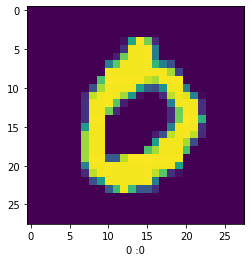

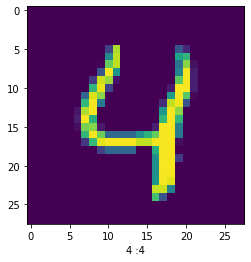

In [ ]:
#显示图片
from PIL import Image
import matplotlib.pyplot as plt

def show_img(arr,label,predict):
  plt.figure('Image')
  plt.imshow(arr.reshape((28,28)))
  plt.xlabel('{} :{}'.format(label,predict))
  plt.show()

for i in range(5):
  arr=test_x[i]
  label=test_y[i]
  predict=result[i]
  show_img(arr,label,predict)
